In [0]:
###Importing the Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras

from keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten
from keras.models import Sequential

In [0]:
###Importing the Dataset from Keras

from keras.datasets.fashion_mnist import load_data

(X_train_orig,Y_train_orig),(X_test_orig,Y_test_orig) = load_data()

4423680/4422102 [==============================] - 2s 1us/step


In [0]:
###Label Dictionary

label_dict = {0:'T-shirt/top',
              1:'Trouser',
              2:'Pullover',
              3:'Dress',
              4:'Coat',
              5:'Sandal',
              6:'Shirt',
              7:'Sneaker',
              8:'Bag',
              9:'Ankle boot'
}

In [0]:
###Overview of the Imported Data

print("X_train Original Shape:",X_train_orig.shape)
print("Y_train Original Shape:",Y_train_orig.shape)
print("X_test Original Shape:",X_test_orig.shape)
print("Y_test Original Shape:",Y_test_orig.shape)

X_train Original Shape: (60000, 28, 28)
Y_train Original Shape: (60000,)
X_test Original Shape: (10000, 28, 28)
Y_test Original Shape: (10000,)


Sandal


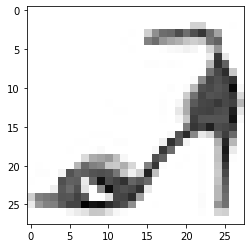

In [0]:
###Visualizing a Training Example

img_index = 2323 #Random Training Example
img = X_train_orig[img_index]
label = Y_train_orig[img_index]

print(label_dict[label])
plt.imshow(img,cmap='Greys')

In [0]:
###Preprocessing the Data

##Reshaping the X arrays
X_train = X_train_orig.reshape(X_train_orig.shape[0],28,28,1)
X_test = X_test_orig.reshape(X_test_orig.shape[0],28,28,1)

##Normalizing the Data
X_train = X_train/255
X_test = X_test/255

In [0]:
##One Hot encoding

Y_train = keras.utils.to_categorical(Y_train_orig,10)
Y_test = keras.utils.to_categorical(Y_test_orig,10)

In [0]:
###Overview of Processed Data

print('X_train Shape:',X_train.shape)
print('Y_train Shape:',Y_train.shape)
print('X_test Shape:',X_test.shape)
print('Y_test Shape:',Y_test.shape)

X_train Shape: (60000, 28, 28, 1)
Y_train Shape: (60000, 10)
X_test Shape: (10000, 28, 28, 1)
Y_test Shape: (10000, 10)


In [0]:
###Creating a Model
input_shape = (28,28,1) #Defining the input shape

model = Sequential() #Allowing the us to make the model, layer by layer.

model.add(Conv2D(32,(3,3),padding='SAME',activation='relu',input_shape = input_shape))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='SAME'))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='SAME'))
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='SAME'))
model.add(Dropout(0.3))

model.add(Conv2D(256,(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='SAME'))
model.add(Dropout(0.3))
model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(10,activation='softmax'))

In [0]:
###Compiling the Model(Choosing our optimizer,our loss function and our metric for perfromance)

model.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics=['categorical_accuracy'])

In [0]:
###Hyperparameters

epochs = 50
batch_size = 64

In [0]:
###Training the model

history = model.fit(X_train,Y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 8s 127us/step - loss: 0.7058 - categorical_accuracy: 0.7376 - val_loss: 0.3734 - val_categorical_accuracy: 0.8599
Epoch 2/50
60000/60000 [==============================] - 7s 115us/step - loss: 0.3963 - categorical_accuracy: 0.8589 - val_loss: 0.3192 - val_categorical_accuracy: 0.8817
Epoch 3/50
60000/60000 [==============================] - 7s 119us/step - loss: 0.3439 - categorical_accuracy: 0.8766 - val_loss: 0.2971 - val_categorical_accuracy: 0.8906
Epoch 4/50
60000/60000 [==============================] - 7s 116us/step - loss: 0.3163 - categorical_accuracy: 0.8851 - val_loss: 0.2791 - val_categorical_accuracy: 0.8972
Epoch 5/50
60000/60000 [==============================] - 7s 115us/step - loss: 0.2928 - categorical_accuracy: 0.8945 - val_loss: 0.2670 - val_categorical_accuracy: 0.9009
Epoch 6/50
60000/60000 [==============================] - 7s 113us/step - loss: 0.2832 - c

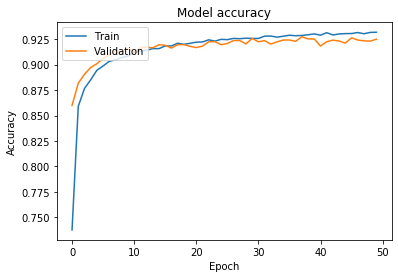

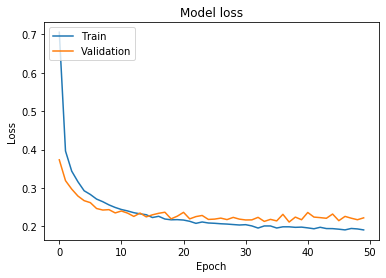

In [0]:
###Plotting the Results

##Accuracy
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

##Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()